In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize':(18,12)})

In [138]:
df = pd.read_csv('mgido-calls-2017-2020.csv')
df.columns = ['date', 'income', 'subst', 'inner', 'wait', 'length']
df.head()

,date,income,subst,inner,wait,length
0,2018-02-14 13:52:01,+7(961)1424189,7(499)6498951,7(499)3496671,00:00:11,00:00:00
1,2018-02-14 13:52:20,7(961)1424189,7(499)3503194,7(495)3496671,00:00:03,00:00:08
2,2018-02-14 13:53:09,+7(961)1424189,7(499)6498951,7(499)3496671,00:00:10,00:00:00
3,2018-02-14 14:00:57,+7(961)1424189,7(499)6498951,7(499)3496671,00:00:09,00:00:00
4,2018-02-14 14:01:00,+7(919)7643665,7(499)6498951,7(499)3496671,00:00:13,00:00:00


In [139]:
# DRY :)
for field in ('income', 'subst', 'inner'):
    df[field] = df.apply({field: lambda x: x[1:] if x.startswith('+') else x})
df.head()

,date,income,subst,inner,wait,length
0,2018-02-14 13:52:01,7(961)1424189,7(499)6498951,7(499)3496671,00:00:11,00:00:00
1,2018-02-14 13:52:20,7(961)1424189,7(499)3503194,7(495)3496671,00:00:03,00:00:08
2,2018-02-14 13:53:09,7(961)1424189,7(499)6498951,7(499)3496671,00:00:10,00:00:00
3,2018-02-14 14:00:57,7(961)1424189,7(499)6498951,7(499)3496671,00:00:09,00:00:00
4,2018-02-14 14:01:00,7(919)7643665,7(499)6498951,7(499)3496671,00:00:13,00:00:00


In [140]:
df.income.nunique()

10184

In [141]:
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)
df.head()

,income,subst,inner,wait,length
date,,,,,
2018-02-14 13:52:01,7(961)1424189,7(499)6498951,7(499)3496671,00:00:11,00:00:00
2018-02-14 13:52:20,7(961)1424189,7(499)3503194,7(495)3496671,00:00:03,00:00:08
2018-02-14 13:53:09,7(961)1424189,7(499)6498951,7(499)3496671,00:00:10,00:00:00
2018-02-14 14:00:57,7(961)1424189,7(499)6498951,7(499)3496671,00:00:09,00:00:00
2018-02-14 14:01:00,7(919)7643665,7(499)6498951,7(499)3496671,00:00:13,00:00:00


In [142]:
df.subst.nunique()

5

In [143]:
df_calls = df.resample('1d').count().drop(df.columns[1:], axis=1).rename({'income':'calls'}, axis=1)
df_calls.head()

,calls
date,
2018-02-14,41
2018-02-15,60
2018-02-16,35
2018-02-17,21
2018-02-18,17


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3bd115c710>]],
      dtype=object)

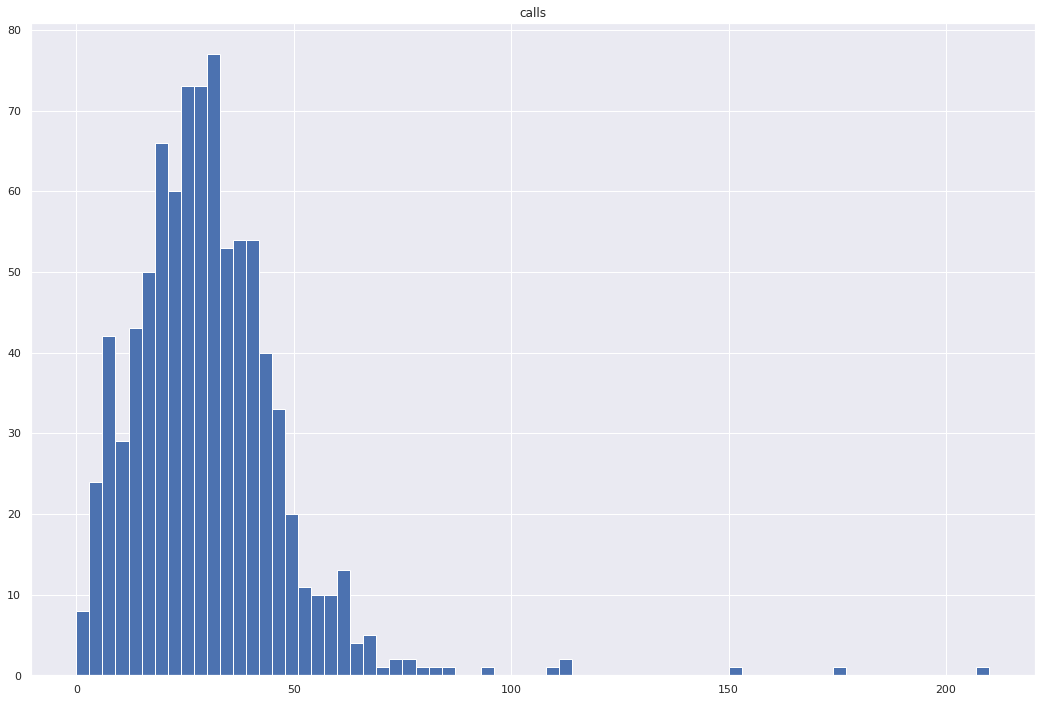

In [144]:
df_calls.hist(bins=70)

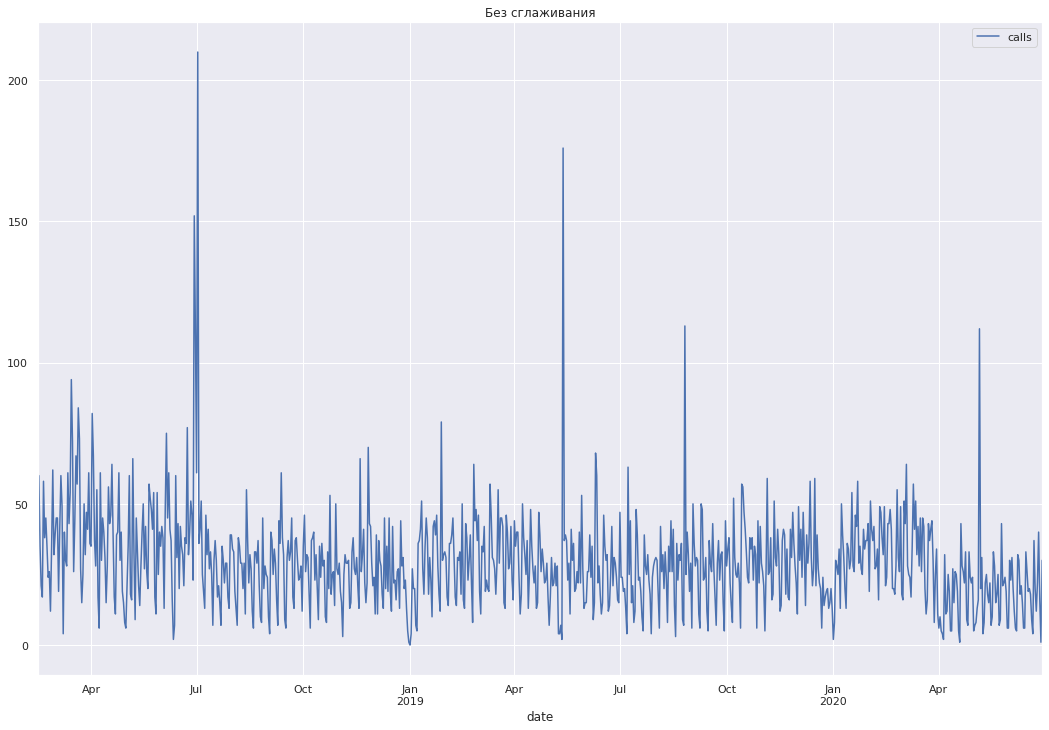

In [145]:
df_calls.plot(title = "Без сглаживания")

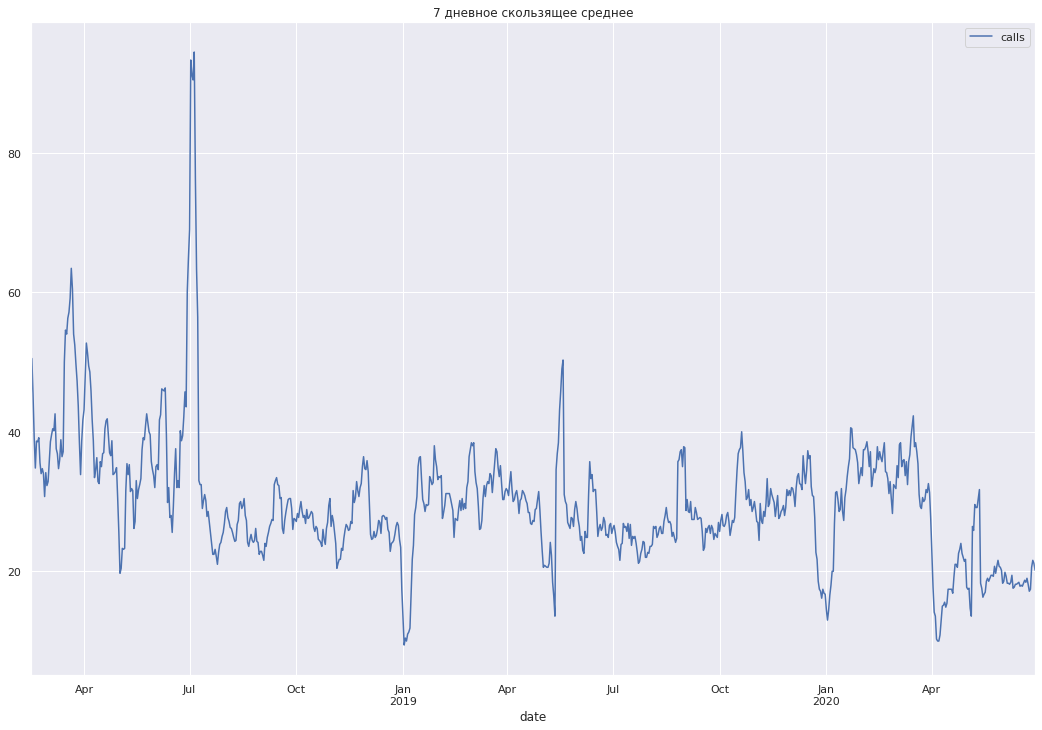

In [146]:
df_calls.rolling(7, min_periods=1).mean().plot(title = "7 дневное скользящее среднее")


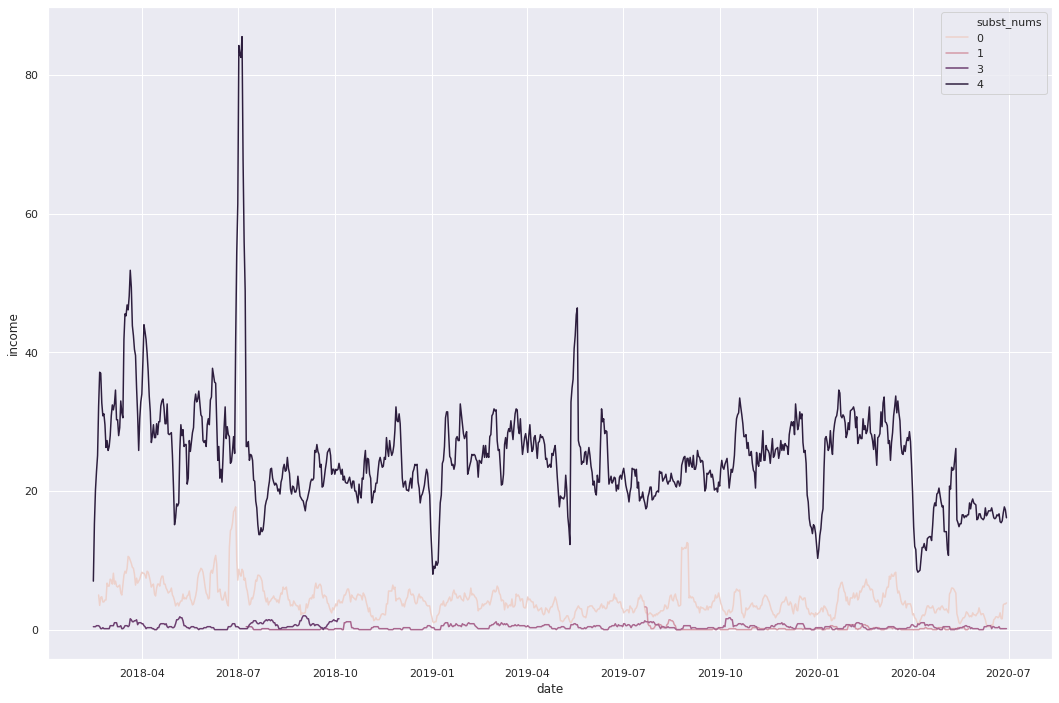

In [148]:
df_phone_calls = df.groupby('subst', as_index=False).resample('1d')\
                        .count().rolling(7, min_periods=1).mean().reset_index()
df_pc = df_phone_calls.set_index('date').rename(columns={'level_0':'subst_nums'})\
                .drop(df_phone_calls.columns[3:], axis=1)
sns.lineplot(x = df_pc.index, y=df_pc['income'], hue=df_pc['subst_nums'])

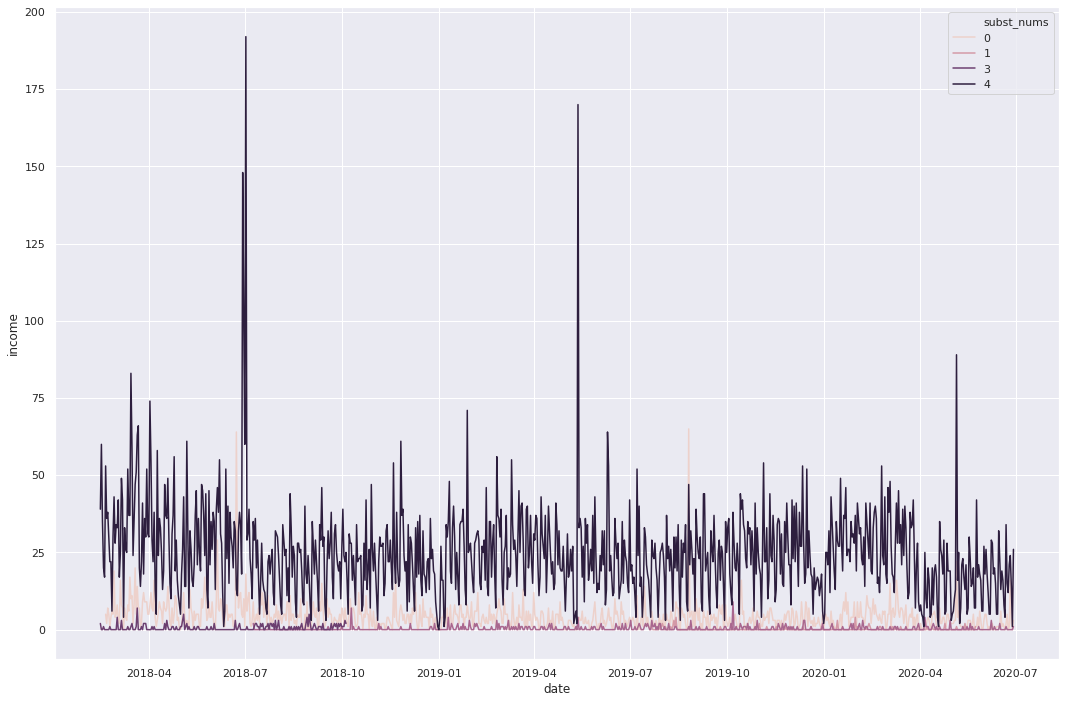

In [149]:
# хочу получить графики по номерам телефонов
df_phone_calls = df.groupby('subst', as_index=False).resample('1d')\
                        .count().reset_index()
df_pc = df_phone_calls.set_index('date').rename(columns={'level_0':'subst_nums'})\
                .drop(df_phone_calls.columns[3:], axis=1)
sns.lineplot(x = df_pc.index, y=df_pc['income'], hue=df_pc['subst_nums'])